In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from pandas_profiling import ProfileReport
import numpy as np

In [2]:
df = pd.read_csv('ai4i2020.csv')

In [5]:
pf = ProfileReport(df)

In [6]:
pf.to_widgets()

# 1. from the profile report we can clearly observe that Process temperature [K] and Air temperature [K] are highly corelated.so our required label a can give a linear regression model with feature Process temperature [K]  

# 2.features like Rotational speed [rpm] and Torque [Nm] are highly corelated.similarly Machine failure is highly correlated with HDF,PWF,OSF

# 3. so from highly corelated feature we can take any one of the feature and discard others.
# so from Rotational speed [rpm] and Torque [Nm] we can take Rotational speed [rpm] as one feature.
# so from Machine failure,HDF,PWF,OSF we can take  Machine failure as another feature.

# 4.so now our total features for model buliding are  Process temperature [K],Rotational speed [rpm],Machine failure with label Air temperature [K] 

Text(0, 0.5, 'Air temperature [K]')

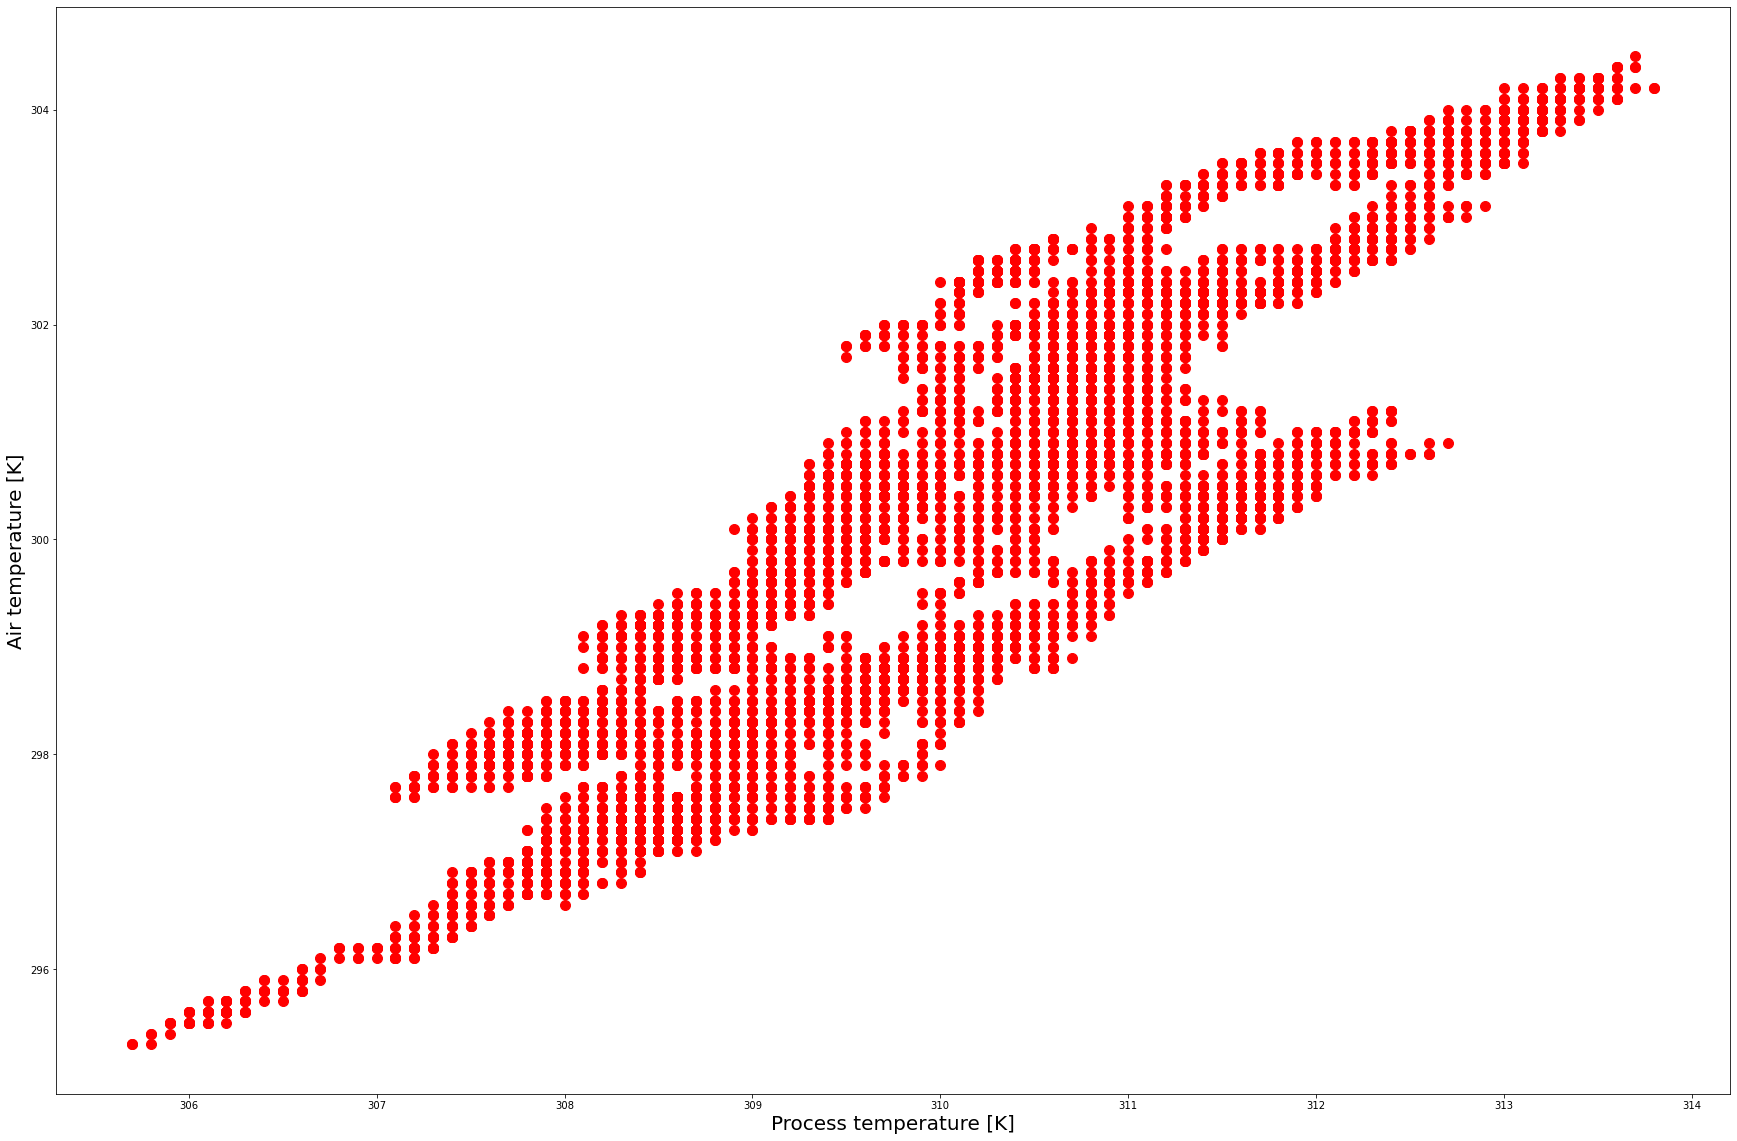

In [73]:
x1 = df["Process temperature [K]"]
y= df["Air temperature [K]"]
plt.figure(figsize=(30,20))
plt.scatter(x1,y,s=100,color="red")
plt.xlabel("Process temperature [K]",fontsize=20)
plt.ylabel("Air temperature [K]",fontsize=20)

# from the scatteer plot of Process temperature [K] vs Air temperature [K] we can assume that they both behave linearly. so we can apply linear regression model between them.

Text(0, 0.5, 'Air temperature [K]')

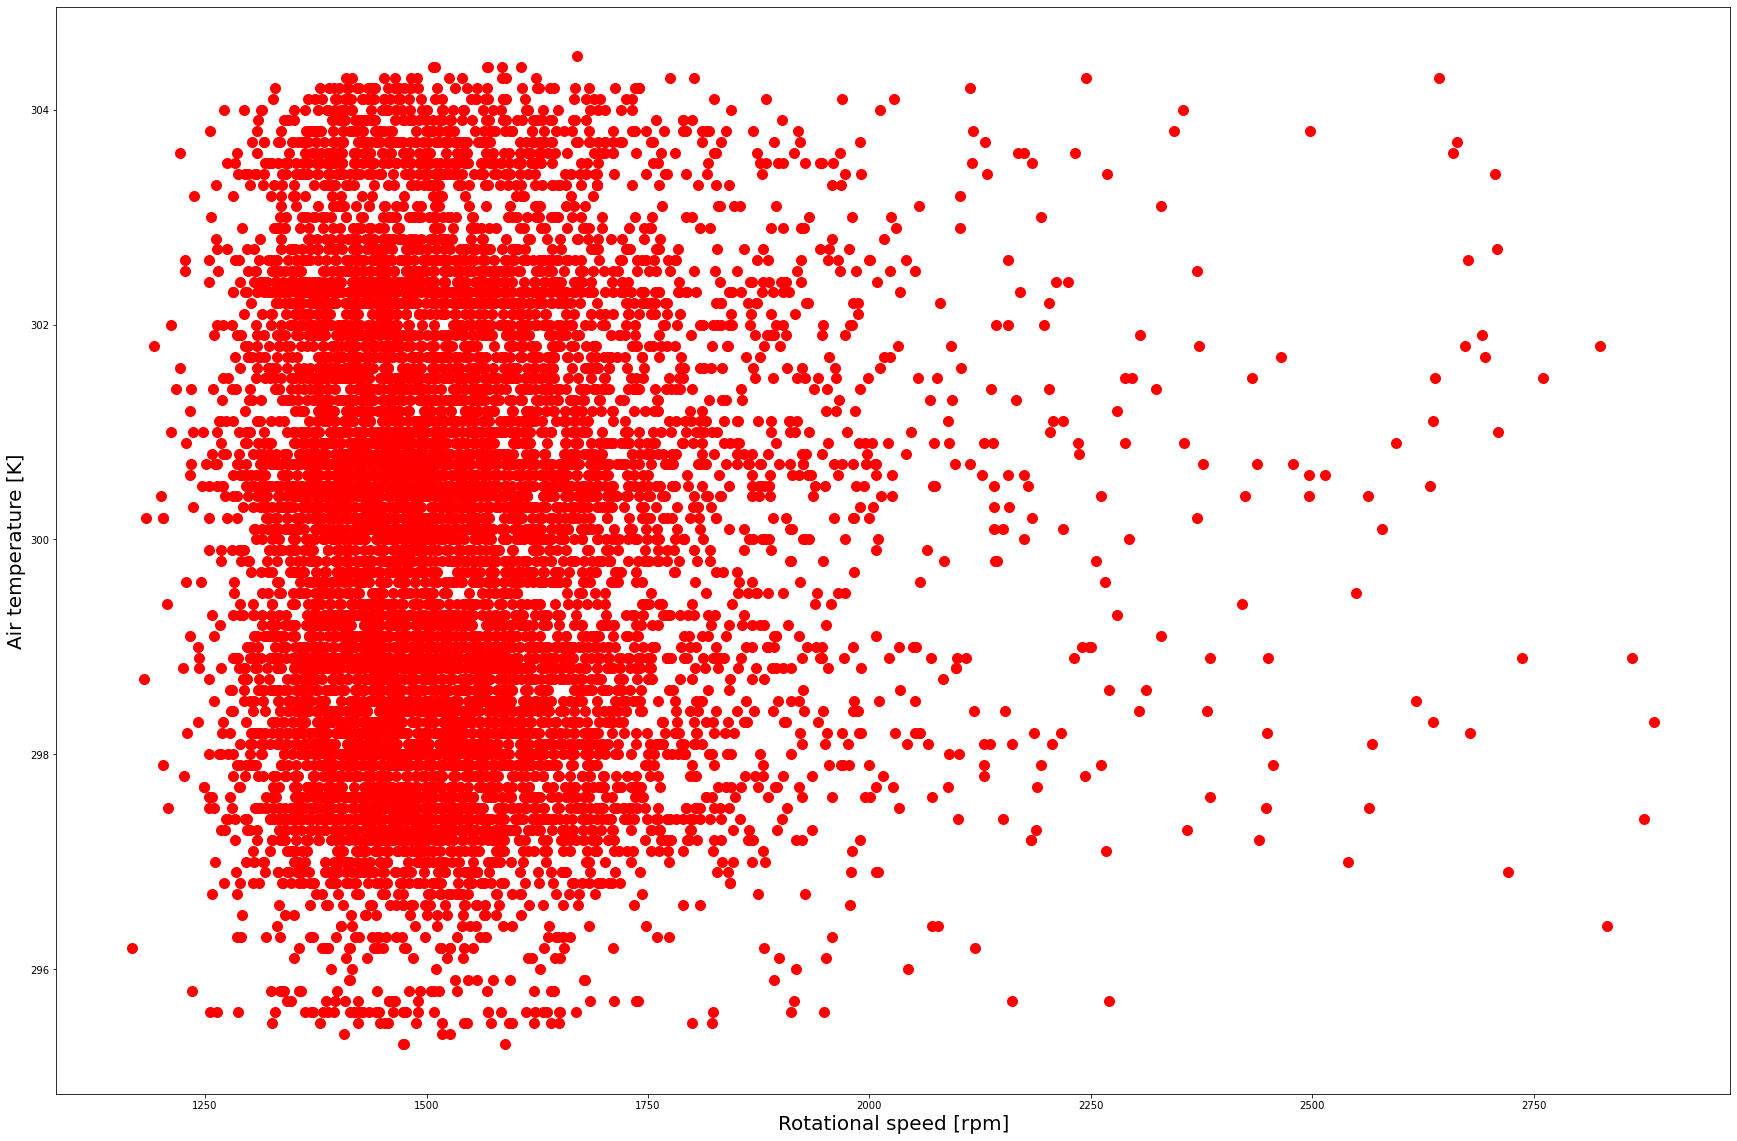

In [38]:
x2 = df["Rotational speed [rpm]"]
y= df["Air temperature [K]"]
plt.figure(figsize=(30,20))
plt.scatter(x2,y,s=100,color="red")
plt.xlabel("Rotational speed [rpm]",fontsize=20)
plt.ylabel("Air temperature [K]",fontsize=20)

# from the scatteer plot of Rotational speed [rpm] vs Air temperature [K] we can clearly see  that lot of data points are not in linear region. so it is not a good idea to apply linear regression model between them

Text(0, 0.5, 'Air temperature [K]')

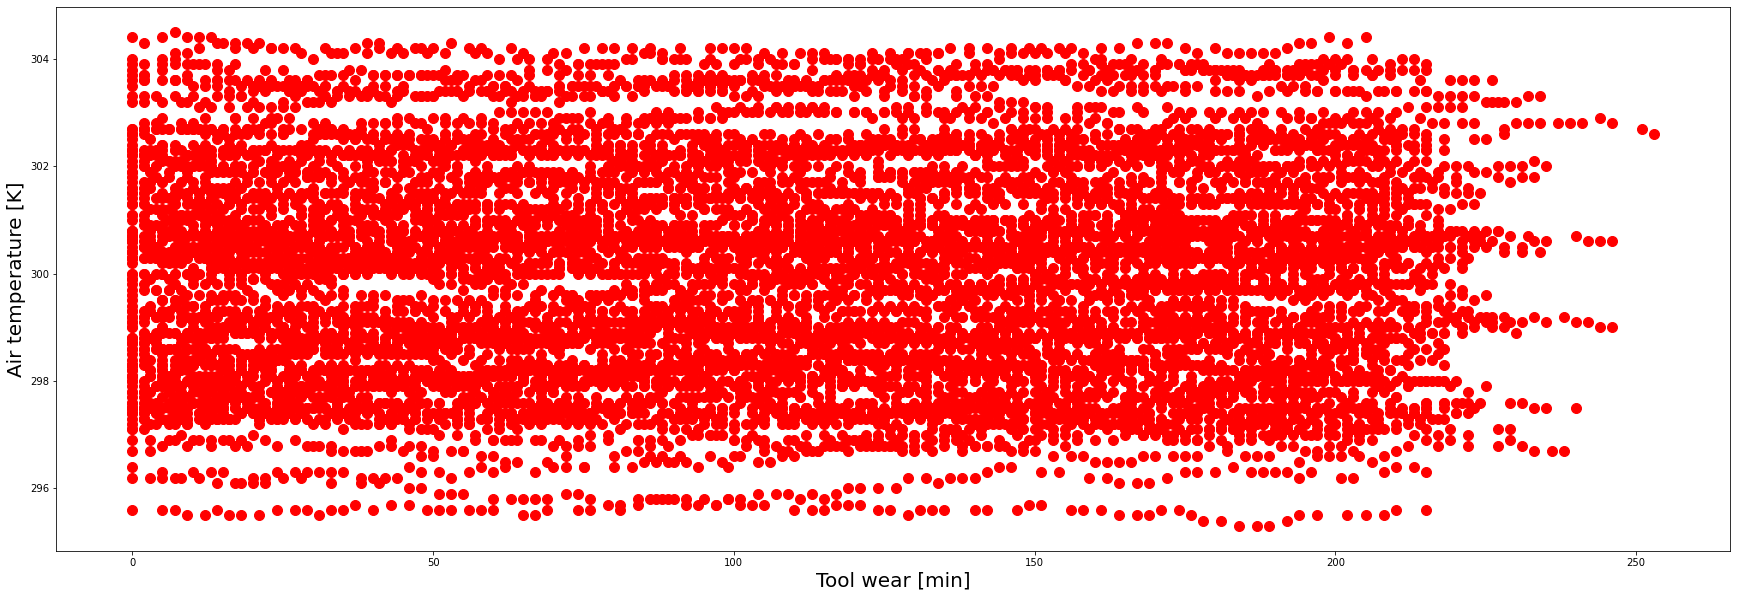

In [44]:
x4 = df["Tool wear [min]"]
y= df["Air temperature [K]"]
plt.figure(figsize=(30,10))
plt.scatter(x4,y,s=100,color="red")
plt.xlabel("Tool wear [min]",fontsize=20)
plt.ylabel("Air temperature [K]",fontsize=20)

Text(0, 0.5, 'Air temperature [K]')

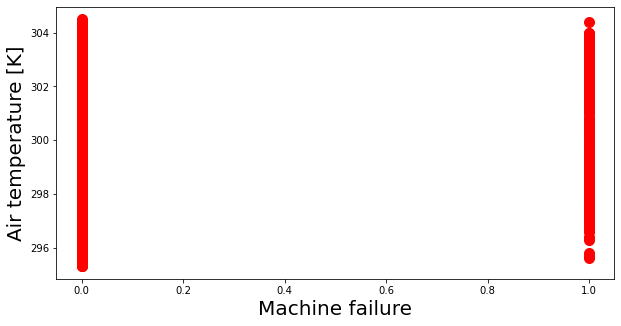

In [56]:
x3 = df["Machine failure"]
y= df["Air temperature [K]"]
plt.figure(figsize=(10,5))
plt.scatter(x3,y,s=100,color="red")
plt.xlabel("Machine failure",fontsize=20)
plt.ylabel("Air temperature [K]",fontsize=20)

# so from the scatter plot of the selected labels we acn observe that only Process temperature [K] can be select for linear regression model.

In [57]:
df.isnull().values.any() #so there is no nan values are present

False

In [69]:
from sklearn.linear_model import LinearRegression
x = df[["Process temperature [K]"]]
y= df["Air temperature [K]"]
linear = LinearRegression()
linear.fit(x,y)
m = linear.coef_
c = linear.intercept_

In [70]:
file = "linear_reg_cw.sav"
pickle.dump(linear,open(file,'wb'))
saved_model = pickle.load(open(file,'rb'))

In [75]:
linear.score(x,y) 

0.7675637525032577

# our model is 76% accurate

In [74]:
l = [305.7,306.9,307.2,308,310.4,310.6,305,9,311.4,312,313.8]
for i in l:
    print(linear.predict([[i]]))

[294.91962593]
[296.33694793]
[296.69127843]
[297.63615975]
[300.47080374]
[300.70702407]
[294.09285477]
[-55.51323677]
[301.6519054]
[302.3605664]
[304.48654939]
